<a href="https://colab.research.google.com/github/smart4ghari/Tensorflow/blob/master/01_Neural_Network_regression_using_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Neural network regression

Simple definition for regression: predicting a numerical value based upon some other combination of numerical value

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating a data to view and fit

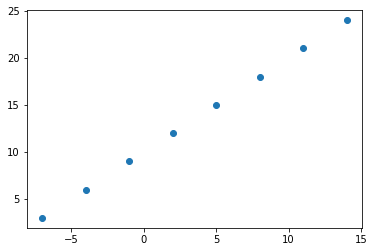

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visuaize 
plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for the Housing price prediction problems
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# We need to train the model using X for y
# So we're using shape function here
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

Oh wait here we're getting only the number of elements present in our dataset but our main motto is to train the model how can we do that thing?😦

In [ ]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Check the shape of first element in tensor
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

 Here the shape of the tensor is empty because it is scalar in dimension


## Steps in modelling with tensorflow
1. ***Creating a model*** - define the input and output layers, as well as the hidden layers of the deep learning model
2. ***Compiling a model*** - define the loss function(Tells how our model is wrong) and the optimizer(improves the patterns in learning) and evaluation metrics(performance of the model)
3. **Fitting the model** - letting the model try to find the patterns between X & y (features and labels)

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is the shorform Mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent)
              metrics = ["mae"])

# 3. Fit the model
model.fit(X,y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 633ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Making a prediction using our model Just for fun
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving our model

we can improve our model by improving the steps that we've created so far

1. ***Creating a model*** - Here we might add more layers, increase the number of hidden layers, change the activation function of each layer
2. ***Compiling a model*** - Here we might change the optimization function or perhaps the learning rate of the optimization function
3. ***Fitting a model*** - Increase the number of epochs

In [ ]:
# Rebuilding our model

# 1. Create a model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1)
])

# 2. Compile a model

model.compile(
               loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"]
)

# 3. Fit a model

model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 341ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 4ms/step

In [ ]:
# prediction 
model.predict([17.0])

array([[31.941307]], dtype=float32)

## Evaluating a model

''' Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it-> tweak a model -> fit it -> evaluate it-> tweak a model -> fit it -> evaluate it'''

when it comes to evaluation we should remember 3 words which is:
> "Visualize, visualize, visualize"

We should visualize the following things
* The data
* The model
* The training model
* The prediction model

In [ ]:
 # Make a bigger dataset
 X = tf.range(-100,101,4)
 X

<tf.Tensor: shape=(51,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96,  100], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(51,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106, 110],
      dtype=int32)>

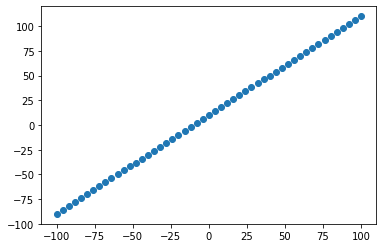

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets concept...

* ***Training Data*** - The model learns from this data typically 70-80% of the total data available
* ***Validation Data*** - The modle gets tuned on this data which is 10-15% of the total data available
* ***Test Data*** - the model gets evaluated on this data to test what it has learned typically 10 - 15% of the total data available

In [ ]:
len(X)

51

In [ ]:
# Split the data into train and test dataset
X_train = X[:40] # The first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # The next 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 11, 40, 11)

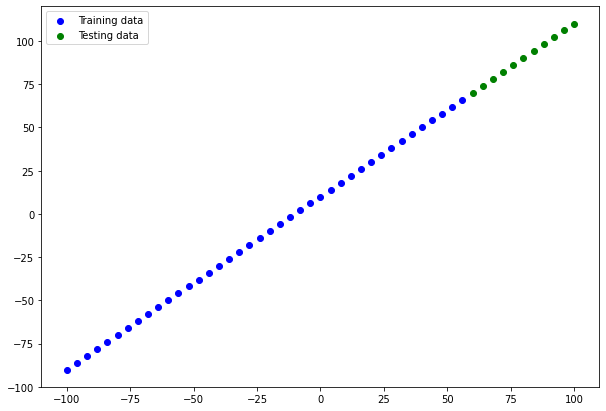

In [ ]:
plt.figure(figsize = (10,7))
# Plot training data in blue
plt.scatter(X_train,y_train,c = "b",label = "Training data")
# Plot testing data in green
plt.scatter(X_test,y_test,c = "g", label = "Testing data")

# Show a legend
plt.legend();

In [ ]:
 # Let's have a look at how to build a neural network

 # 1.Create a model
 model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
 ])

 # 2.Compile a model
 model.compile(loss = tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.SGD(),
            metrics = ["mae"])
 
#  # 3.Fitting a model
#  model.fit(X_train,y_train,epochs = 100)

In [ ]:
# Getting the input_shape automatically
tf.random.set_seed(42)

#1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3,input_shape = [1],name = "Input_Layer"),
    tf.keras.layers.Dense(1,name = "Output_Layer")
],name = "Model_1")

#2.Compile a model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 3)                 6         
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


* Total Params = Total number of parameters in the model
* Trainable parameters = These parameters can update as it trains
* Non trainable parameters = These parameters aren't updated during training

In [ ]:
# 3.Fit the mode
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 43.8872 - mae: 43.8872
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8576 - mae: 11.8576
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 18.9307 - mae: 18.9307
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 13.6602 - mae: 13.6602
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 15.0215 - mae: 15.0215
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 11.9269 - mae: 11.9269
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2274 - mae: 11.2274
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0736 - mae: 11.0736
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.5734 - mae: 40.5734
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.9568 - mae: 27.9568
Epoch 11/100
2/2 [==============================] - 0s 5ms

In [ ]:
# Get a summary of our model
model.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 3)                 6         
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


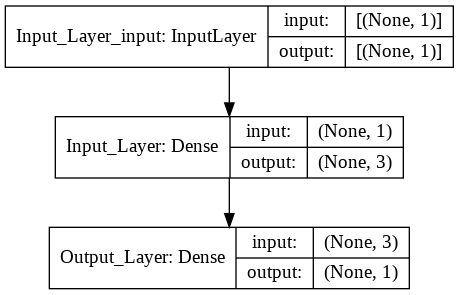

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True)

## Visualising our model prediction

> To Visualise models prediction it's a good practice to plot them against ground truth labels

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[ 88.35568 ],
       [ 94.12197 ],
       [ 99.88827 ],
       [105.65456 ],
       [111.420845],
       [117.18714 ],
       [122.95344 ],
       [128.71971 ],
       [134.48602 ],
       [140.25232 ],
       [146.0186  ]], dtype=float32)

In [ ]:
# Plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     prediction = y_pred):
  """Plots training data,test data and compares prediction to ground labels"""
  plt.figure(figsize = (10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels,c = "b",label = "Training data")
  # plot testing data in green
  plt.scatter(test_data,test_labels,c = "g",label = "Testing data")
  # plot model's prediction in red
  plt.scatter(test_data,prediction,c = "r",label = "Prediction")
  # Show the model
  plt.legend();

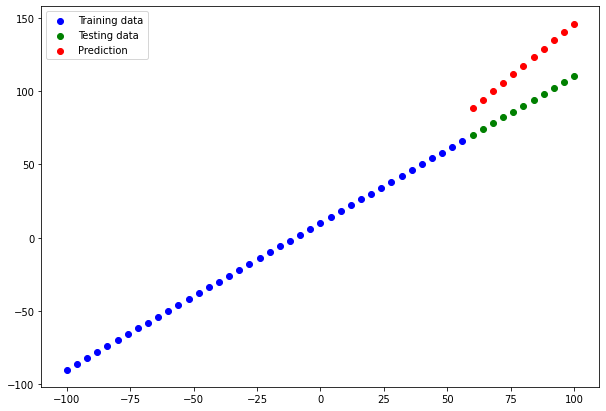

In [ ]:
plot_predictions()

### Evaluating our model prediction with regression evaluation metrics

> MAE - Mean Average Error "On average how wrong our model's prediction"


> MSE - Mean Square Error "Square of average error"